**Rasa is Opensource Machine Learning framework used for developing AI based chatbot.**


In [1]:
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 9.7 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 3.0 MB 49.9 MB/s 
     |████████████████████████████████| 3.2 MB 65.0 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 448 kB 50.9 MB/s 
     |████████████████████████████████| 149 kB 60.8 MB/s 
     |████████████████████████████████| 72 kB 606 kB/s 
     |████████████████████████████████| 174 kB 63.3 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 417 kB 55.2 MB/s 
     |████████████████████████████████| 979 kB 31.7 MB/s 
     |████████████████████████████████| 132 kB 56.5 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████████████████████████| 422.0 MB 30 kB/s 
     |███████████████████████

**Little Changes in Installtion**
1. upgrade table from 3.7.0 to 3.6.1
2. upgrade ipython to avoid crashing colab session, while doing restart the runtime.

After, installing ipython you saw a "RESTART RUNTIME" button in "ipython" cell output. 

Click on it to restart the runtime and you are good to go. 

No need to update anything run as usual.


In [2]:
!pip install -U tables==3.6.1

     |████████████████████████████████| 4.3 MB 6.7 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0


In [3]:
!pip install -U ipython

     |████████████████████████████████| 792 kB 7.7 MB/s 
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 2.0.10 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.1 which is incompatible.


**Click on above "RESTART RUNTIME" button**

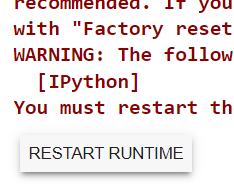

In [1]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 8.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.10 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [3]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [4]:
from rasa.cli.scaffold import create_initial_project

In [5]:
project = "test-project"
create_initial_project(project)

In [6]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['domain.yml', '__init__.py', 'data', 'tests', 'credentials.yml', '__pycache__', 'actions.py', 'endpoints.yml', 'config.yml']


In [7]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


### Sometime it may not run on first go. So, try to execute below line 3 time and it work fine. It is bug in rasa.

In [8]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 74.06it/s, # actions=16]
Processed actions: 16it [00:00, 643.16it/s, # examples=16]
Epochs: 100%|██████████| 100/100 [00:14<00:00,  6.85it/s, t_loss=0.083, loss=0.012, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs: 100%|██████████| 100/100 [00:15<00:00,  6.28it/s, t_loss=1.531, i_loss=0.144, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20220218-134251.tar.gz'.
models/20220218-134251.tar.gz


In [9]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hey
Hey! How are you?
great
Great, carry on!
/stop


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
i am fine
Great, carry on!
am i talking to human
I am a bot, powered by Rasa.
/stop
